In [805]:
#Used in Tensorflow Model
import numpy
import tflearn
import random
import json
import pickle
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
import random
from tensorflow import keras
import matplotlib.pyplot as plt 
import pandas as pd

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()


# import our chat-bot intents file
with open('intents.json') as file:
    data = json.load(file)

try:
    with open("data.pickle", "rb") as f:
        words, labels, training, output = pickle.load(f)
except:

# organize our documents, words and classification classes
    words = []
    labels = []
    docs_x = []
    docs_y = []

    
    # loop through each sentence in our intents patterns
    for intent in data["intents"]:
        for pattern in intent["patterns"]:
            #tokenize words
            #tokenize means chopping off the words into different chunks
            wrds = nltk.word_tokenize(pattern)
            words.extend(wrds)

            #its just going to append all the patterns we have
            # add to our words list
            docs_x.append(wrds)
            # add to documents in our corpus
            docs_y.append(intent["tag"])


    #taking all the tags in a list  
        if intent["tag"] not in labels:
            labels.append(intent["tag"])

# in linguistic morphology and information retrieval,
# stemming is the process of reducing inflected
# (or sometimes derived) words to their word stem, base or root form

    #we are going to to covert every word and turn them into lower case
    words = [stemmer.stem(w.lower()) for w in words if w != "?"]

    #sorted them by creating a list, set remove duplicate
    words = sorted(list(set(words)))

    labels = sorted(labels)

    # save to pickle
    pickle.dump(words,open('words.pkl','wb'))
    pickle.dump(labels,open('classes.pkl','wb'))

   
# unfortunately this data structure won’t work
    # with Tensorflow, we need to transform it further:
    # from documents of words into tensors of numbers.
    # up until now we created a string but we need to convert into numbers to work on DNN
        
    #bagging onehotencoder
    training = []
    output = []

    out_empty = [0 for _ in range(len(labels))]

    for x, doc in enumerate(docs_x):
        bag = []
        # stem each word
        wrds = [stemmer.stem(w.lower()) for w in doc]
         # create our bag of words array
        for w in words:
            if w in wrds:
                bag.append(1)
            else:
                bag.append(0)
        # output is a '0' for each tag and '1' for current tag
        output_row = out_empty[:]
        output_row[labels.index(docs_y[x])] = 1

        training.append([bag,output_row])


    with open("data.pickle", "wb") as f:
        pickle.dump((words, labels, training, output), f)

    # print (len(docs_x), "documents", docs_x)
    # print (len(labels), "classes", labels)
    # print (len(words), "unique stemmed words", words)

In [806]:
#training
random.shuffle(training)
training=numpy.array(training)  
X_train=list(training[:,0])
y_train=list(training[:,1])  

#Model
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(len(X_train[0]),)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]),activation='softmax'))

adam=keras.optimizers.Adam(0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(np.array(X_train),np.array(y_train),epochs=200,batch_size=10,verbose=1)

try:
    model.load("mymodel.h5")
except:
    history=model.fit(numpy.array(X_train),numpy.array(y_train),validation_split=0.20,epochs=200,batch_size=10,verbose=1)    
    model.save("mymodel.h5",history)

C:\Users\ELLAIN~1\AppData\Local\Temp/ipykernel_13764/3682883600.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training=numpy.array(training)


Train on 1110 samples, validate on 278 samples
Epoch 1/200
1110/1110 [==============================] - 1s 847us/sample - loss: 4.6491 - acc: 0.0198 - val_loss: 4.6042 - val_acc: 0.0360
Epoch 2/200
1110/1110 [==============================] - 0s 283us/sample - loss: 4.4904 - acc: 0.0505 - val_loss: 4.3261 - val_acc: 0.0791
Epoch 3/200
1110/1110 [==============================] - 0s 317us/sample - loss: 4.1418 - acc: 0.0919 - val_loss: 3.8823 - val_acc: 0.1403
Epoch 4/200
1110/1110 [==============================] - 0s 323us/sample - loss: 3.7441 - acc: 0.1532 - val_loss: 3.4465 - val_acc: 0.2086
Epoch 5/200
1110/1110 [==============================] - 0s 282us/sample - loss: 3.4071 - acc: 0.1955 - val_loss: 3.0965 - val_acc: 0.2878
Epoch 6/200
1110/1110 [==============================] - 0s 300us/sample - loss: 3.1094 - acc: 0.2550 - val_loss: 2.8421 - val_acc: 0.3525
Epoch 7/200
1110/1110 [==============================] - 0s 350us/sample - loss: 2.8421 - acc: 0.3018 - val_loss: 2.551

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


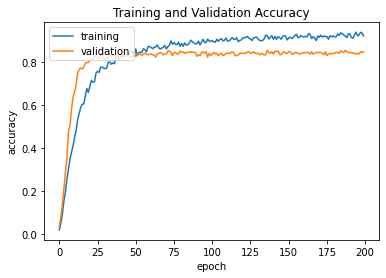

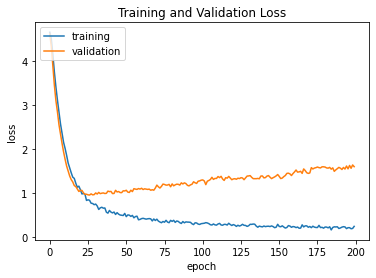

In [807]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [808]:

def bag_of_words(s, words, show_details=True):
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
            
    return numpy.array(bag)


# #chat method to take input and show output 
# def chat(inp):
#         results = model.predict([[bag_of_words(inp, words)]])[0]
#         results_index = numpy.argmax(results)
#         tag = labels[results_index]


#         if results[results_index] > 0.75:
#             for tg in data["intents"]:
#                 if tg['tag'] == tag:
#                     responses = tg['responses']
#                     return (random.choice(responses))
       
#         return 'Sorry, I didnt get that. what is your question again?'




# if __name__ == "__main__":
#     print("Start talking with the bot (type quit to stop)!")
#     while True:
#         inp = input("You: ")
#         if inp.lower() == "quit":
#             break

#         resp = chat(inp)
#         print(resp)


In [809]:
p = bag_of_words("signs of pregnancy", words)
print (p)
print (labels)

found in bag: sign
found in bag: of
found in bag: pregn
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [810]:
def classify_local(sentence):
    ERROR_THRESHOLD = 0.75

    # generate probabilities from the model
    results = model.predict([[bag_of_words(sentence, words)]])[0]
    results_index = numpy.argmax(results)
    tag = labels[results_index]
    # filter out predictions below a threshold, and provide intent index
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []

    list_of_intents= data['intents']    
    for i in list_of_intents:
        if tag==i['tag'] :
            result= random.choice(i['responses'])
    
    for r in results:
        return_list.append((labels[r[0]], str(r[1])))
        
    return return_list, result

In [811]:
classify_local('Signs of pregnancy?')

found in bag: sign
found in bag: of
found in bag: pregn


([('pregnancy_symptoms', '0.99999833')],
 'You may feel extra tired in the early days of pregnancy. The most common sign of pregnancy is a missing period, but you might also experience nausea, heartburn, constipation, tiredness, or breast tenderness.')

In [812]:
classify_local('can i drink black coffee?')

found in bag: can
found in bag: i
found in bag: drink
found in bag: coff


([('coffee', '1.0')],
 'Lots of studies have investigated a possible link between caffeine and a higher risk of miscarriage, but the results are unclear, according to the ACOG. The organization adds that a small daily dose of caffeine during pregnancy')

In [813]:
classify_local('can i eat fish?')

found in bag: can
found in bag: i
found in bag: eat
found in bag: fish


([('fish', '0.99971026')],
 "Eating enough of the right types of seafood is not only healthy but recommended for both you and your baby. Pregnant and breastfeeding women should eat 8 to 12 ounces (that's two to three servings) of low-mercury fish every week.")

In [814]:
classify_local('is it okay to exercise when pregnant?')

found in bag: is
found in bag: it
found in bag: okay
found in bag: to
found in bag: exerc
found in bag: when
found in bag: pregn


([('exercise', '0.96250695')],
 'Yes mommy! Exercise is a good thing for normal, healthy pregnancies. For regular healthy women who are having a low-risk pregnancy, exercise is actually recommended')

In [815]:
classify_local('ca@n i drin@k black coffe3!@#?')

found in bag: ca
found in bag: i
found in bag: !


([], 'How long have you been experiencing this?')

In [816]:
classify_local('Sign$ 0f pregnancy###%%%?')

found in bag: sign
found in bag: pregn


([('pregnancy_symptoms', '0.9999981')],
 'You may feel extra tired in the early days of pregnancy. The most common sign of pregnancy is a missing period, but you might also experience nausea, heartburn, constipation, tiredness, or breast tenderness.')

In [817]:
classify_local('Ca5n i ea@t fi$h?')

found in bag: i


([('symptoms1_morningsickness', '0.9900323')],
 'Oh I see! What else are you feeling aside from that, mommy? Do you feel any of these; please type your symptoms. Vomiting, dizziness, nausea, double vision, Chest pain, Sweating, fatigue, dizziness, chills, alternating between feeling cold and feeling hot, migraine, Fainting, Shortness of breathe, high blood pressure, dark yellow urine, swelling, abdominal or shoulder pain, lower back pain, non-stop bleeding, low blood pressure, rapid heartbeat, anemia, sensation of spinning, laboured breathing, blurred vision, unusual vaginal discharge, fever, increased frequent urination, Weight loss, increased thirst?')

In [818]:
classify_local('is o!@#kay !@# exercise!@ pregnant!@#?')

found in bag: is
found in bag: !
found in bag: !
found in bag: exerc
found in bag: !
found in bag: pregn
found in bag: !


([('exercise', '0.9790192')],
 'Yes mommy! Exercise is a good thing for normal, healthy pregnancies. For regular healthy women who are having a low-risk pregnancy, exercise is actually recommended')

In [819]:
classify_local('wh3n will i n0otice!@# th@t im pr3gnant!@#?')

found in bag: wil
found in bag: i
found in bag: !
found in bag: im
found in bag: !


([('pregnancy_symptoms', '0.83305484')],
 'You may feel extra tired in the early days of pregnancy. The most common sign of pregnancy is a missing period, but you might also experience nausea, heartburn, constipation, tiredness, or breast tenderness.')

In [820]:
classify_local('Me is not ok?')

found in bag: me
found in bag: is
found in bag: not


([],
 'Healthy pregnant women need at least 2Â½ hours of moderate-intensity aerobic activity each week. Aerobic activities make you breathe faster and deeply and make your heart beat faster. Moderate-intensity means youâ€™re active enough to sweat and increase your heart rate. Taking a brisk walk is an example of moderate-intensity aerobic activity.')

In [821]:
classify_local('is okay exercise pregnant?')

found in bag: is
found in bag: okay
found in bag: exerc
found in bag: pregn


([('exercise', '0.9835231')],
 'Yes mommy! Exercise is a good thing for normal, healthy pregnancies. For regular healthy women who are having a low-risk pregnancy, exercise is actually recommended')

In [822]:
classify_local('ankle swell')

found in bag: ankl
found in bag: swel


([('leg_swelling', '0.99999976')],
 'You cannot keep your legs and ankles from swelling but you can do things to make it better. Make sure that when you are sitting you elevate your legs. Your feet should ideally be higher than your heart. An easy way to do this is to sit in a recliner or on a couch with your feet propped up on the armrest. Avoid standing for long periods of time.')

In [823]:
classify_local('Baby move when?')

found in bag: baby
found in bag: when


([('baby_size', '0.99991643')], 'What week are you pregnant?')

In [824]:
classify_local('Bleed my nose')

found in bag: blee
found in bag: my
found in bag: nos


([('nosebleed', '1.0')],
 'The lining of the respiratory system receives more blood during pregnancy, causing congestion. This congestion might produce nasal stuffiness or nosebleeds. Increased blood pressure damages small blood vessels in the nose, causing nosebleeds. Congestion can be relieved with saline nasal spray. You can use a cool mist humidifier to relieve congestion and nose bleeds.')